In [88]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression #, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC



from sklearn.datasets import load_boston

In [50]:
#load the dataset
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
boston = load_boston()

In [52]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [54]:
boston_data = boston.data
boston_target = boston.target 
boston_feature_names = boston.feature_names
boston_data_t = np.column_stack((boston_data, boston_target))
columns = list(boston_feature_names) + ['target']


In [55]:
data = pd.DataFrame(boston_data_t, columns=columns)

In [24]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#print the first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# check the data (exploratory analysis)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
 # no missing value
data.isnull().sum().sum()

0

<AxesSubplot:>

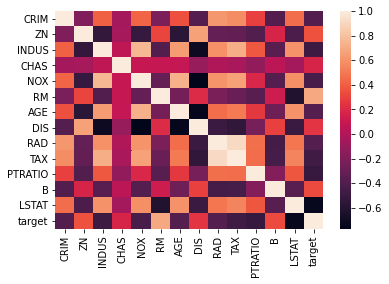

In [38]:
sns.heatmap(data.corr())

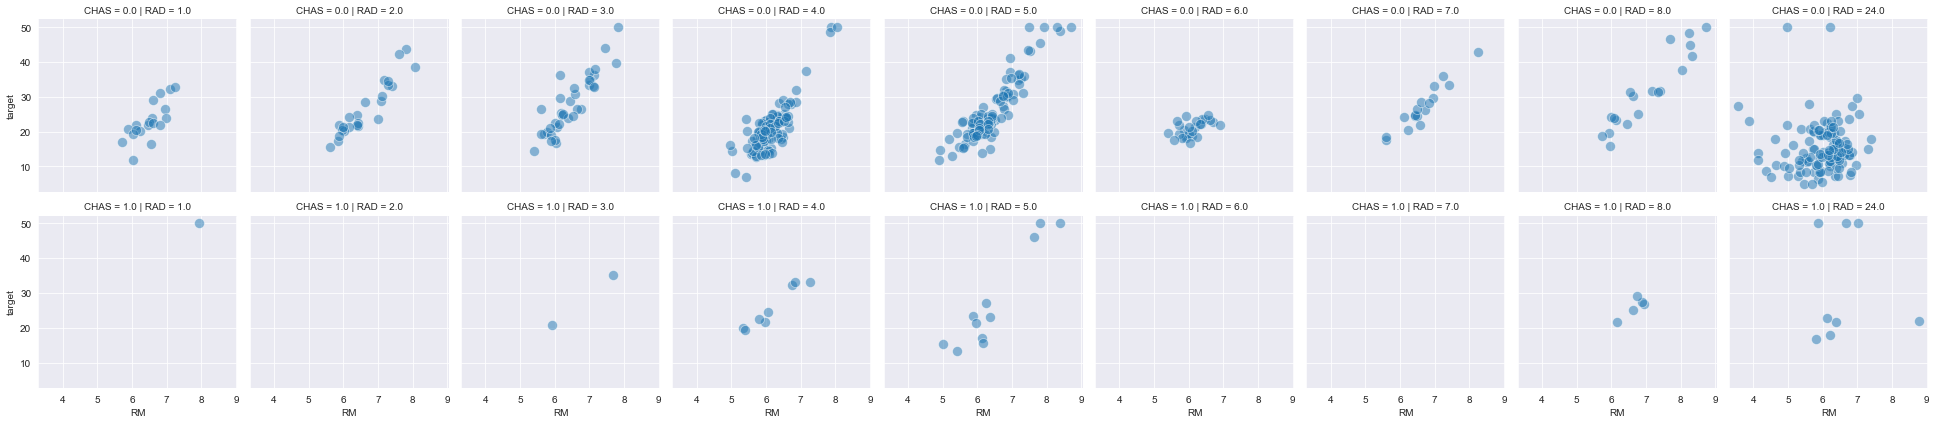

In [137]:
g = sns.FacetGrid(data, col='RAD', row='CHAS')
g.map(sns.scatterplot, "RM", "target", s=100, alpha=.5)

plt.show()

In [3]:
### select the most important features. Some questions you can ask yourself:

#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

In [41]:
feature_cols = ['RM', 'ZN', 'CHAS', 'DIS', 'B', 'LSTAT', 'PTRATIO', 'TAX']

In [46]:
X = data[feature_cols].values
y = data['target']

In [47]:
## split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [ ]:
## Pick one model to use, such as Linear Regression -seen in class-.

In [106]:
models = {'LinearR':LinearRegression(),'RandForReg':RandomForestRegressor(),'KNeighborsReg':KNeighborsRegressor(),'RidgeCV':RidgeCV(),  'GradientBoostReg':GradientBoostingRegressor()}

In [132]:
scores = []
for model in models:
    clf = models[model]
    #print(clf)
    clf.fit(X_train, y_train)

    acc_score = clf.score(X_test, y_test)
    scores.append(acc_score)

In [133]:
model_score_df = pd.DataFrame({'Models':models.keys(), 'Accuracy_Score': scores})

array([27.96042263, 34.89667567, 16.9885503 , 24.02378515, 18.57512116,
       22.13446205, 17.68913653, 15.29440826, 20.22172352, 21.0499029 ,
       23.35337817, 18.76969017, -4.44564626, 20.96199926, 19.11616021,
       24.76403429, 19.8053318 ,  4.72142234, 39.66136269, 17.80173309,
       26.54753067, 28.73562766, 11.95055828, 25.80535906, 17.69529326,
       13.43635532, 21.71660671, 14.7285376 , 21.35556412, 19.69854687,
       20.75393856, 25.39484725, 26.76692953, 18.36095985, 13.9814348 ,
       20.61760593, 31.78579251, 20.52318797, 22.85298659, 23.54510303,
       13.81961359, 30.61961391, 41.34175357, 16.74924567, 26.98484638,
       16.41409456, 14.73059326, 24.92297439, 18.04664382, 31.10857784,
       21.46651602, 32.79197299, 16.94674442, 27.04564423, 39.20634346,
       21.00604918, 19.07246713, 32.06786091, 24.52554539, 12.48884263,
       23.148161  , 30.9489685 , 30.17836417, 16.45639236, 23.02441318,
       15.12507552, 20.18561196, 25.45522096, 30.34420816, 10.93

In [134]:
## test the accuracy and print the score with one model

0.6336160098070751

In [135]:
model_score_df

,Models,Accuracy_Score
0,LinearR,0.633616
1,RandForReg,0.846855
2,KNeighborsReg,0.558155
3,RidgeCV,0.639561
4,GradientBoostReg,0.866630


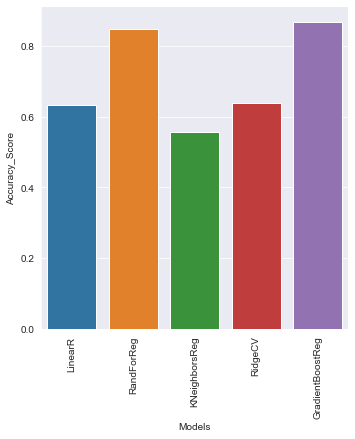

In [128]:
sns.set_style('darkgrid')
sns.catplot(data=model_score_df, kind='bar', x='Models', y='Accuracy_Score', ax=ax)
plt.xticks(rotation=90);